In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

In [2]:
def parquet_files_to_df(dir_path):
    """
    Load all of the recon2D data from the specified directory into a pandas DataFrame.
    """
    parquet_files = glob.glob(os.path.join(dir_path, "*.parquet"))
    dataframes = []
    
    for file in tqdm(parquet_files, desc="Reading Parquet files"):
        df_sample = pd.read_parquet(file, engine='pyarrow', columns=None)
        last_273_columns = df_sample.columns[-273:]
        dataframes.append(pd.read_parquet(file, columns=last_273_columns))
    df = pd.concat(dataframes)

    return df

In [3]:
df_1 = parquet_files_to_df('/data/dajiang/smartPixels/dataset_2s/dataset_2s_100x25x150_parquets/unflipped/recon2D/')
df_2 = parquet_files_to_df('/data/dajiang/smartPixels/dataset_2s/dataset_2s_100x25_parquets/unflipped/recon2D/')
df_3 = parquet_files_to_df('/data/dajiang/smartPixels/dataset_2s/dataset_2s_50x25_parquets/unflipped/recon2D/')
df_4 = parquet_files_to_df('/data/dajiang/smartPixels/dataset_2s/dataset_2s_50x20_parquets/unflipped/recon2D/')
df_5 = parquet_files_to_df('/data/dajiang/smartPixels/dataset_2s/dataset_2s_50x15_parquets/unflipped/recon2D/')
df_6 = parquet_files_to_df('/data/dajiang/smartPixels/dataset_2s/dataset_2s_50x12P5_parquets/unflipped/recon2D/')
df_7 = parquet_files_to_df('/data/dajiang/smartPixels/dataset_2s/dataset_2s_50x10_parquets/unflipped/recon2D/')

Reading Parquet files: 100%|██████████| 41/41 [00:32<00:00,  1.25it/s]


#### Convert the DataFrames to Numpy Arrays, reshaping each row to a 13x21 array (13 rows, 21 columns)

In [4]:
arr_1 = df_1.values
arr_2 = df_2.values
arr_3 = df_3.values
arr_4 = df_4.values
arr_5 = df_5.values
arr_6 = df_6.values
arr_7 = df_7.values

pixel_arrays_1 = arr_1.reshape(-1,13,21)
pixel_arrays_2 = arr_2.reshape(-1,13,21)
pixel_arrays_3 = arr_3.reshape(-1,13,21)
pixel_arrays_4 = arr_4.reshape(-1,13,21)
pixel_arrays_5 = arr_5.reshape(-1,13,21)
pixel_arrays_6 = arr_6.reshape(-1,13,21)
pixel_arrays_7 = arr_7.reshape(-1,13,21)

#### Calculate the x and y cluster sizes
* `axis = 1` represents the y-pitch (13 pixels)
* `axis = 2` represents the x-pitch (21 pixels)

In [5]:
x_sizes_1 = np.count_nonzero(np.any(pixel_arrays_1 >= 1, axis=1), axis=1)
x_sizes_2 = np.count_nonzero(np.any(pixel_arrays_2 >= 1, axis=1), axis=1)
x_sizes_3 = np.count_nonzero(np.any(pixel_arrays_3 >= 1, axis=1), axis=1)
x_sizes_4 = np.count_nonzero(np.any(pixel_arrays_4 >= 1, axis=1), axis=1)
x_sizes_5 = np.count_nonzero(np.any(pixel_arrays_5 >= 1, axis=1), axis=1)
x_sizes_6 = np.count_nonzero(np.any(pixel_arrays_6 >= 1, axis=1), axis=1)
x_sizes_7 = np.count_nonzero(np.any(pixel_arrays_7 >= 1, axis=1), axis=1)

y_sizes_1 = np.count_nonzero(np.any(pixel_arrays_1 >= 1, axis=2), axis=1)
y_sizes_2 = np.count_nonzero(np.any(pixel_arrays_2 >= 1, axis=2), axis=1)
y_sizes_3 = np.count_nonzero(np.any(pixel_arrays_3 >= 1, axis=2), axis=1)
y_sizes_4 = np.count_nonzero(np.any(pixel_arrays_4 >= 1, axis=2), axis=1)
y_sizes_5 = np.count_nonzero(np.any(pixel_arrays_5 >= 1, axis=2), axis=1)
y_sizes_6 = np.count_nonzero(np.any(pixel_arrays_6 >= 1, axis=2), axis=1)
y_sizes_7 = np.count_nonzero(np.any(pixel_arrays_7 >= 1, axis=2), axis=1)

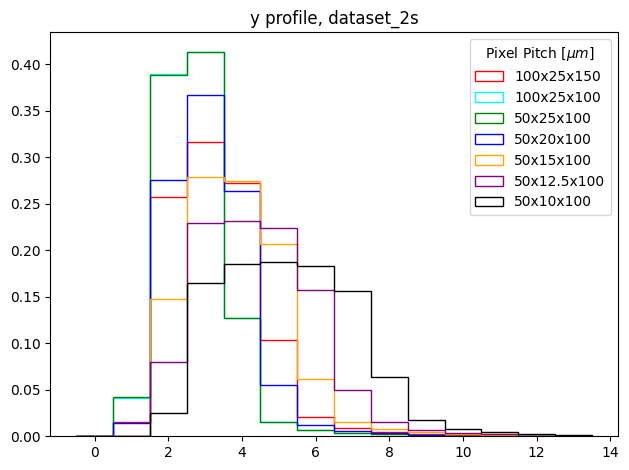

In [6]:
# y profile
fig, ax = plt.subplots()
bins=np.linspace(-0.5,13.5,15)

ax.hist(y_sizes_1, bins=bins, histtype='step', label='100x25x150', color='red', density=True)
ax.hist(y_sizes_2, bins=bins, histtype='step', label='100x25x100', color='cyan', density=True)
ax.hist(y_sizes_3, bins=bins, histtype='step', label='50x25x100', color='green', density=True)
ax.hist(y_sizes_4, bins=bins, histtype='step', label='50x20x100', color='blue', density=True)
ax.hist(y_sizes_5, bins=bins, histtype='step', label='50x15x100', color='orange', density=True)
ax.hist(y_sizes_6, bins=bins, histtype='step', label='50x12.5x100', color='purple', density=True)
ax.hist(y_sizes_7, bins=bins, histtype='step', label='50x10x100', color='black', density=True)

ax.legend(title='Pixel Pitch [$\mu m$]')
ax.set_title('y profile, dataset_2s')

fig.tight_layout()
fig.savefig('/home/dajiang/smart-pixels-ml/plots/dataset_2s_plots/y_profile_all.png', dpi=300)
fig.show()

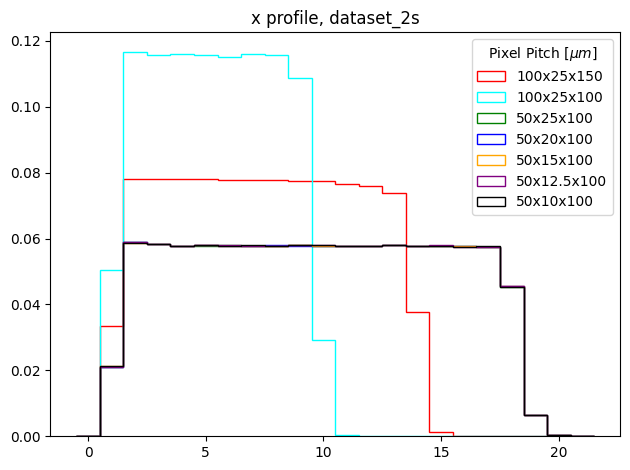

In [7]:
# y profile
fig, ax = plt.subplots()
bins=np.linspace(-0.5,21.5,23)

ax.hist(x_sizes_1, bins=bins, histtype='step', label='100x25x150', color='red', density=True)
ax.hist(x_sizes_2, bins=bins, histtype='step', label='100x25x100', color='cyan', density=True)
ax.hist(x_sizes_3, bins=bins, histtype='step', label='50x25x100', color='green', density=True)
ax.hist(x_sizes_4, bins=bins, histtype='step', label='50x20x100', color='blue', density=True)
ax.hist(x_sizes_5, bins=bins, histtype='step', label='50x15x100', color='orange', density=True)
ax.hist(x_sizes_6, bins=bins, histtype='step', label='50x12.5x100', color='purple', density=True)
ax.hist(x_sizes_7, bins=bins, histtype='step', label='50x10x100', color='black', density=True)

ax.legend(title='Pixel Pitch [$\mu m$]')
ax.set_title('x profile, dataset_2s')

fig.tight_layout()
fig.savefig('/home/dajiang/smart-pixels-ml/plots/dataset_2s_plots/x_profile_all.png', dpi=300)
fig.show()